In [1]:
!pip install pyodbc pandas


In [22]:
import pyodbc
import pandas as pd

conn_str = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost;"
    "DATABASE=EMSData;"
    "Trusted_Connection=yes;"
)

conn = pyodbc.connect(conn_str)

sql = "SELECT * FROM dbo.PCR_Jan2024;"  # or PCR_Jan2024

df = pd.read_sql(sql, conn)

df.head()


C:\Users\acyan\AppData\Local\Temp\ipykernel_15760\3988108935.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,PcrKey,eDispatch_01,eDispatch_02,eArrest_14,eArrest_01,eArrest_02,eArrest_05,eArrest_07,eArrest_11,eArrest_16,...,eScene_08,eScene_09,eSituation_02,eSituation_07,eSituation_08,eSituation_13,eSituation_20,eSituation_01,eSituation_18,eDisposition_17
0,282214234,2301071,7701003,Not Recorded,3001001,7701003,Unknown,7701003,7701003,7701003,...,7701003,Y92.23,9922001,2807011,2808003,2813005,2820015,Not Recorded,Not Recorded,4217001
1,282264643,2301051,7701003,Not Applicable,7701001,7701001,Unknown,7701001,7701001,7701001,...,7701001,Y92.23,9922003,2807011,2808007,2813003,7701003,Not Recorded,Not Recorded,4217001
2,282265028,2301067,2302001,Not Applicable,7701001,7701001,Unknown,7701001,7701001,7701001,...,7701001,Y92.23,9922003,7701003,2808005,2813005,7701003,Not Recorded,Not Recorded,4217001
3,282265222,2301073,2302001,Not Applicable,7701001,7701001,Unknown,7701001,7701001,7701001,...,7701001,7701003,9922003,2807007,2808015,2813003,2820031,01JAN2024:11:36:00,Not Recorded,4217001
4,282271609,2301061,2302005,Not Recorded,7701003,7701003,Unknown,7701003,7701003,7701003,...,7701001,Y92.01,9922001,2807011,7701003,2813005,7701003,Not Recorded,Not Recorded,4217005


In [23]:
rename_map = {
    "PcrKey":        "incident_id",
    "eDispatch_01":  "dispatch_center_id",
    "eDispatch_02":  "dispatch_call_id",
    "eResponse_05":  "service_requested_type",
    "eResponse_07":  "unit_transport_capability",
    "eResponse_23":  "response_misc_field",
    "eResponse_08":  "crew_size_or_delay_type",
    "eResponse_12":  "response_additional_mode",
    "eScene_01":     "first_unit_on_scene_flag",
    "eScene_06":     "num_patients_at_scene",
    "eScene_07":     "mass_casualty_flag",
    "eScene_08":     "scene_factor_1",
    "eScene_09":     "primary_symptom_or_scene_descr",
    "eSituation_01":"chief_complaint_location",
    "eSituation_02":"possible_injury_flag",
    "eSituation_07":"primary_impression",
    "eSituation_08":"secondary_impression",
    "eSituation_13":"trauma_score_or_severity",
    "eSituation_18":"provider_narrative_1",
    "eSituation_20":"provider_narrative_2",
    "eOutcome_01":  "hospital_destination_code",
    "eOutcome_02":  "ed_disposition",
    "eOutcome_11":  "hospital_admit_time",
    "eOutcome_16":  "hospital_discharge_time",
    "eOutcome_18":  "long_term_outcome",
    "ePatient_15":  "patient_age_value",
    "ePatient_16":  "patient_age_units",
}

df = df.rename(columns=rename_map)

df.head()


,incident_id,dispatch_center_id,dispatch_call_id,eArrest_14,eArrest_01,eArrest_02,eArrest_05,eArrest_07,eArrest_11,eArrest_16,...,scene_factor_1,primary_symptom_or_scene_descr,possible_injury_flag,primary_impression,secondary_impression,trauma_score_or_severity,provider_narrative_2,chief_complaint_location,provider_narrative_1,eDisposition_17
0,282214234,2301071,7701003,Not Recorded,3001001,7701003,Unknown,7701003,7701003,7701003,...,7701003,Y92.23,9922001,2807011,2808003,2813005,2820015,Not Recorded,Not Recorded,4217001
1,282264643,2301051,7701003,Not Applicable,7701001,7701001,Unknown,7701001,7701001,7701001,...,7701001,Y92.23,9922003,2807011,2808007,2813003,7701003,Not Recorded,Not Recorded,4217001
2,282265028,2301067,2302001,Not Applicable,7701001,7701001,Unknown,7701001,7701001,7701001,...,7701001,Y92.23,9922003,7701003,2808005,2813005,7701003,Not Recorded,Not Recorded,4217001
3,282265222,2301073,2302001,Not Applicable,7701001,7701001,Unknown,7701001,7701001,7701001,...,7701001,7701003,9922003,2807007,2808015,2813003,2820031,01JAN2024:11:36:00,Not Recorded,4217001
4,282271609,2301061,2302005,Not Recorded,7701003,7701003,Unknown,7701003,7701003,7701003,...,7701001,Y92.01,9922001,2807011,7701003,2813005,7701003,Not Recorded,Not Recorded,4217005


Data summary
--------------------------------------------------


,Column,Dtype,Missing,Unique
0,incident_id,int64,0,90000
1,dispatch_center_id,object,0,45
2,dispatch_call_id,object,0,6
3,eArrest_14,object,0,404
4,eArrest_01,object,0,5
5,eArrest_02,object,0,9
6,eArrest_05,object,0,1
7,eArrest_07,object,0,5
8,eArrest_11,object,0,8
9,eArrest_16,object,0,7



Column type groups
--------------------------------------------------
Numerical columns: ['incident_id']
Categorical columns: ['dispatch_center_id', 'dispatch_call_id', 'eArrest_14', 'eArrest_01', 'eArrest_02', 'eArrest_05', 'eArrest_07', 'eArrest_11', 'eArrest_16', 'eArrest_18', 'eArrest_20', 'eArrest_21', 'eArrest_22', 'eDisposition_19', 'eDisposition_16', 'eDisposition_21', 'eDisposition_22', 'eDisposition_32', 'eDisposition_27', 'eDisposition_28', 'eDisposition_29', 'eDisposition_30', 'hospital_destination_code', 'ed_disposition', 'hospital_admit_time', 'hospital_discharge_time', 'long_term_outcome', 'patient_age_value', 'patient_age_units', 'ePayment_01', 'ePayment_50', 'service_requested_type', 'unit_transport_capability', 'response_misc_field', 'first_unit_on_scene_flag', 'num_patients_at_scene', 'mass_casualty_flag', 'scene_factor_1', 'primary_symptom_or_scene_descr', 'possible_injury_flag', 'primary_impression', 'secondary_impression', 'trauma_score_or_severity', 'provider_na

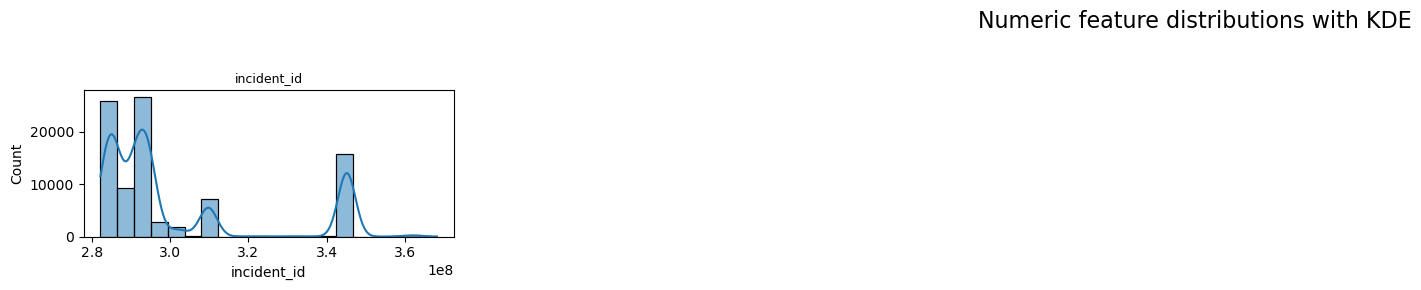


Boxplots for potential outliers (non-binary numeric)
--------------------------------------------------


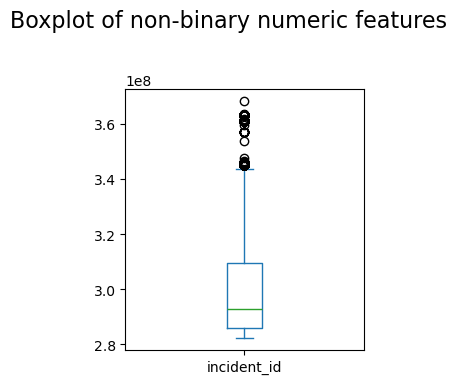

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Data inspection summary
def data_inspection_summary(df):
    summary = pd.DataFrame({
        "Column": df.columns,
        "Dtype": df.dtypes.astype(str).values,
        "Missing": df.isnull().sum().values,
        "Unique": df.nunique().values,
    })
    return summary

print("Data summary\n" + "-"*50)
display(data_inspection_summary(df))


# 2) Split columns into numerical, categorical, date, binary
print("\nColumn type groups\n" + "-"*50)

numerical_cols = df.select_dtypes(include="number").columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "bool"]).columns.tolist()
date_cols = df.select_dtypes(include=["datetime64[ns]", "datetime64"]).columns.tolist()

# Binary numeric columns: exactly {0,1}
binary_cols = []
for col in numerical_cols:
    uniques = sorted(df[col].dropna().unique())
    if len(uniques) == 2 and set(uniques) == {0, 1}:
        binary_cols.append(col)

numerical_cols_non_binary = [c for c in numerical_cols if c not in binary_cols]

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)
print("Date columns:", date_cols)
print("Binary columns:", binary_cols)
print("Numerical (non-binary):", numerical_cols_non_binary)


# 3) Histograms with KDE for all numeric columns
if numerical_cols:
    print("\nData distribution with KDE (numeric)\n" + "-"*50)

    ncols = 6
    n = len(numerical_cols)
    nrows = n // ncols + int(n % ncols != 0)

    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
    axes = axes.flatten()

    for ax, col in zip(axes, numerical_cols):
        sns.histplot(df[col].dropna(), bins=20, kde=True, ax=ax, edgecolor="black")
        ax.set_title(col, fontsize=9)

    # Hide any unused axes
    for ax in axes[n:]:
        ax.set_visible(False)

    plt.suptitle("Numeric feature distributions with KDE", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
else:
    print("\nNo numeric columns to plot.")


# 4) Boxplots for non-binary numeric columns
if numerical_cols_non_binary:
    print("\nBoxplots for potential outliers (non-binary numeric)\n" + "-"*50)

    df[numerical_cols_non_binary].plot(
        kind="box",
        subplots=True,
        layout=(1, len(numerical_cols_non_binary)),
        figsize=(min(70, len(numerical_cols_non_binary) * 3), 4),
        sharey=False,
    )
    plt.suptitle("Boxplot of non-binary numeric features", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
else:
    print("\nNo non-binary numeric columns for boxplots.")


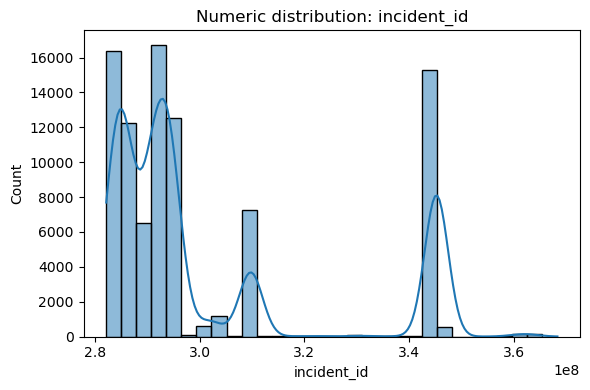

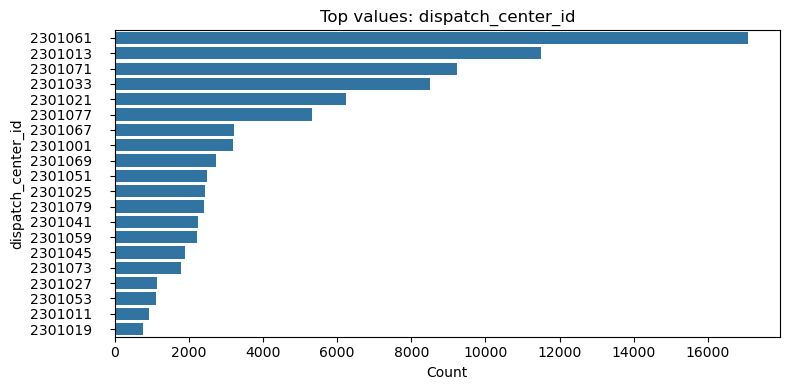

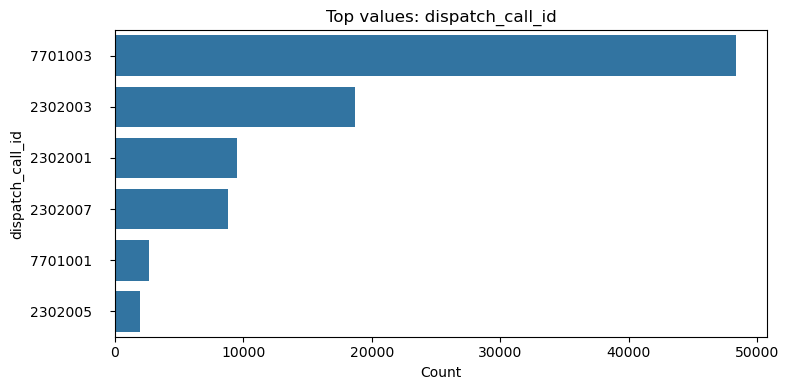

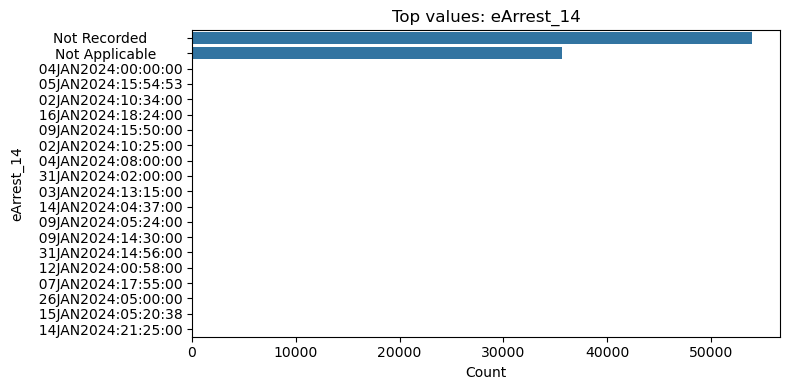

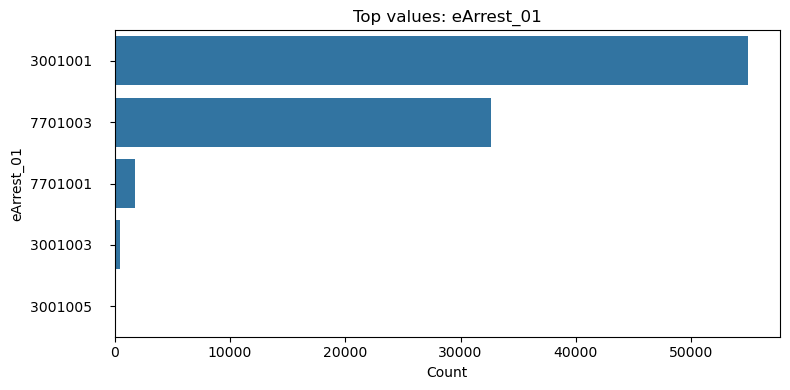

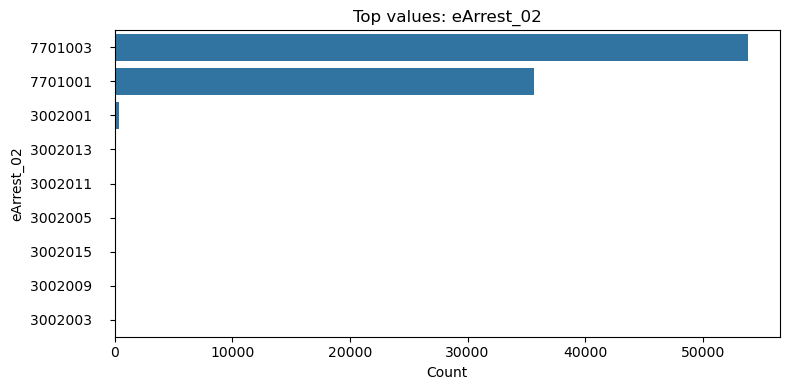

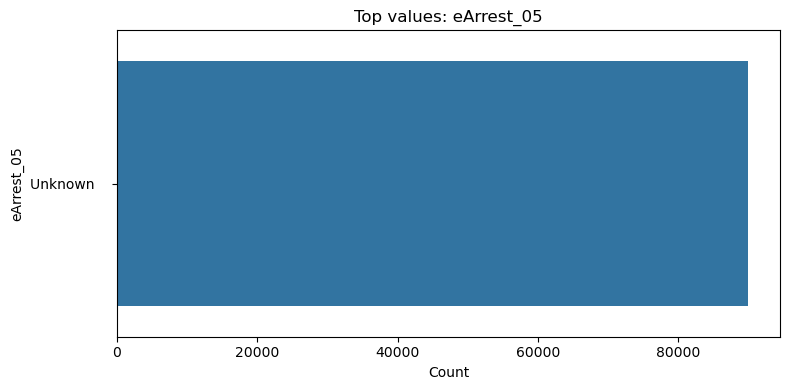

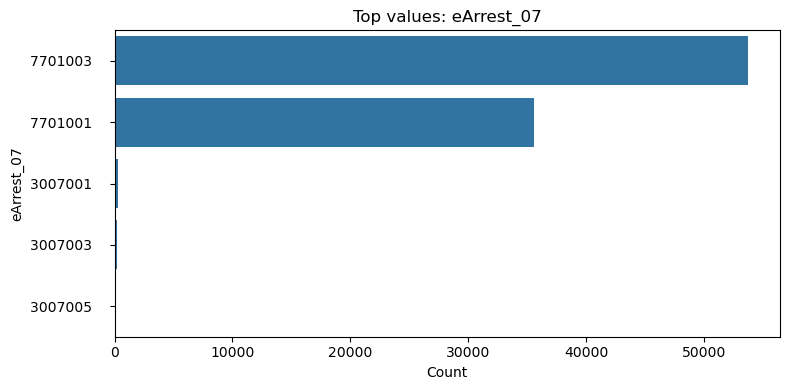

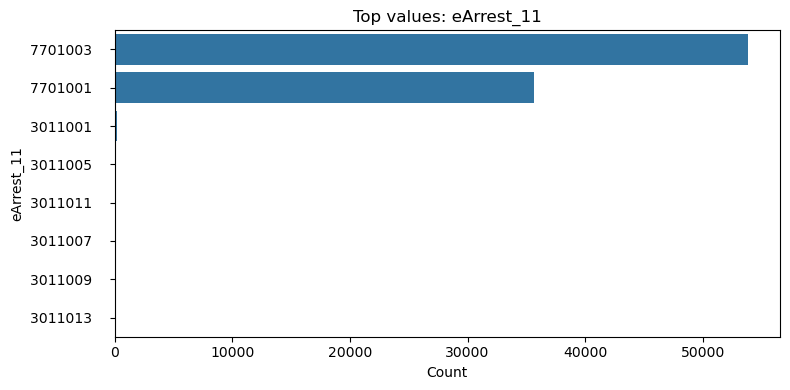

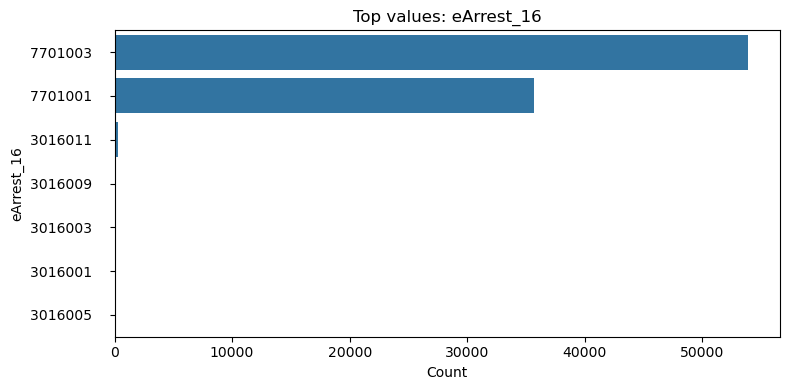

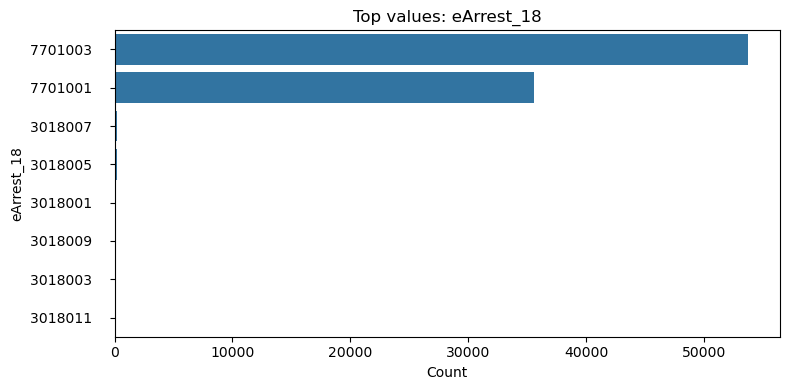

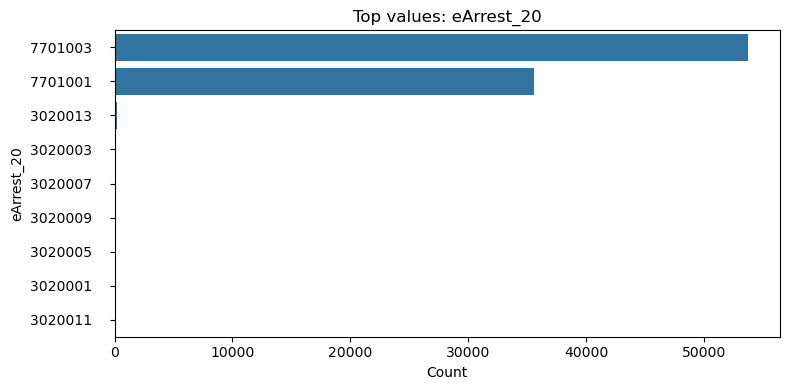

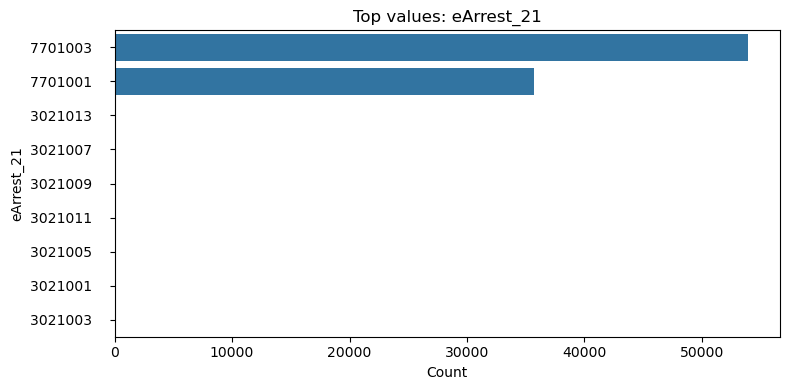

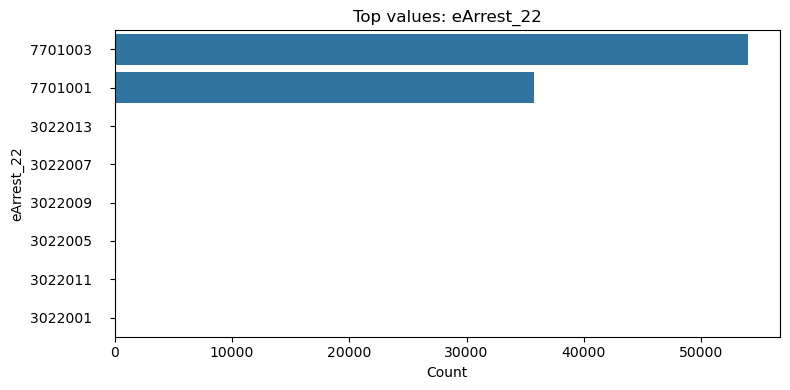

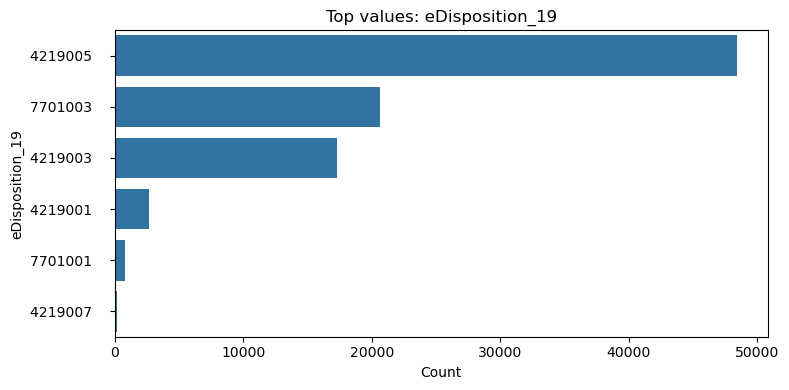

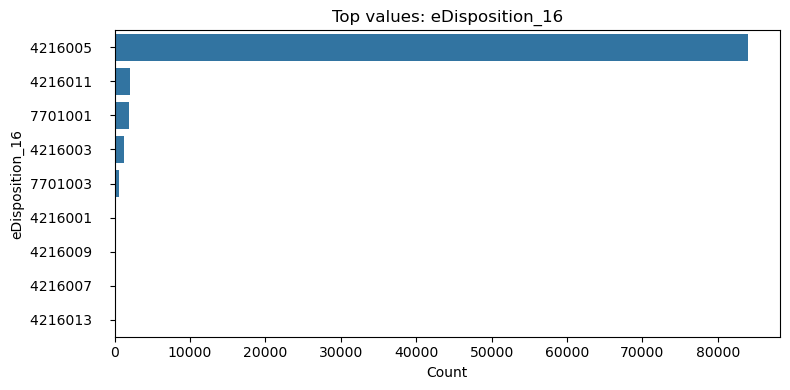

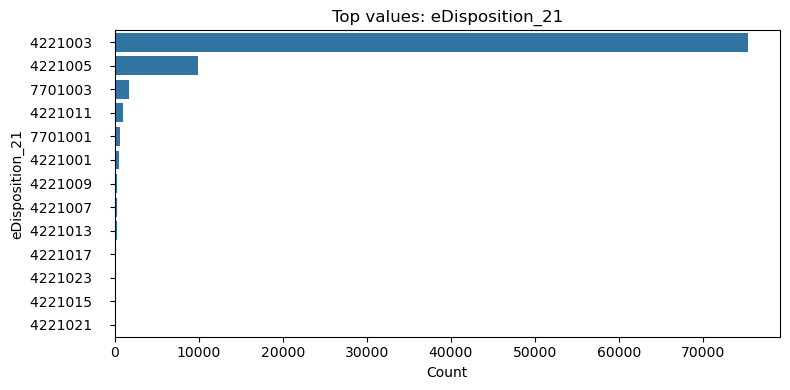

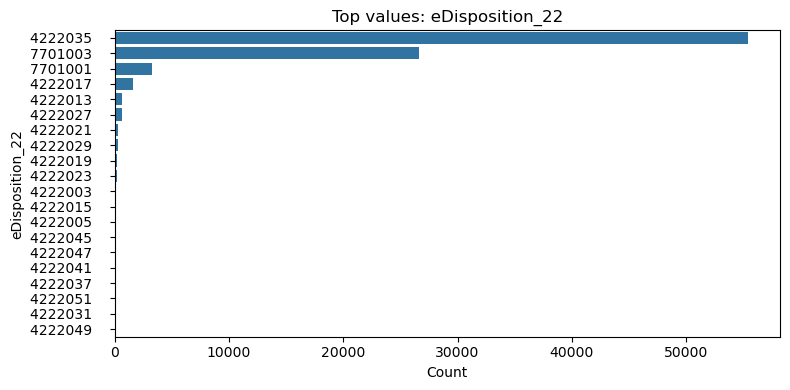

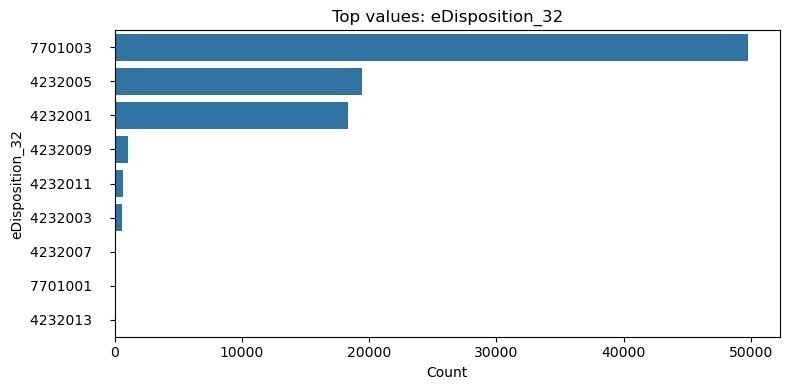

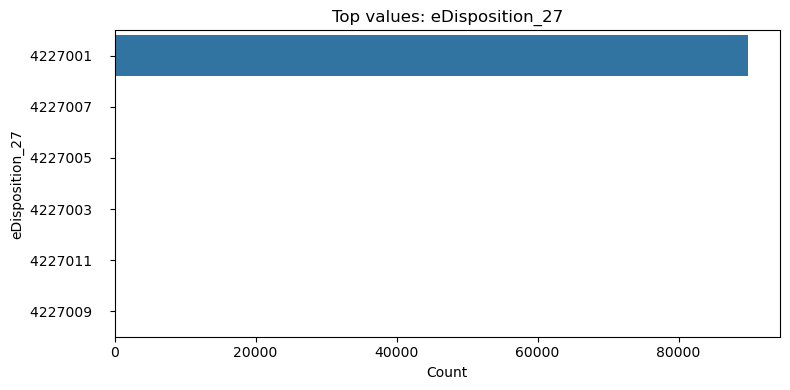

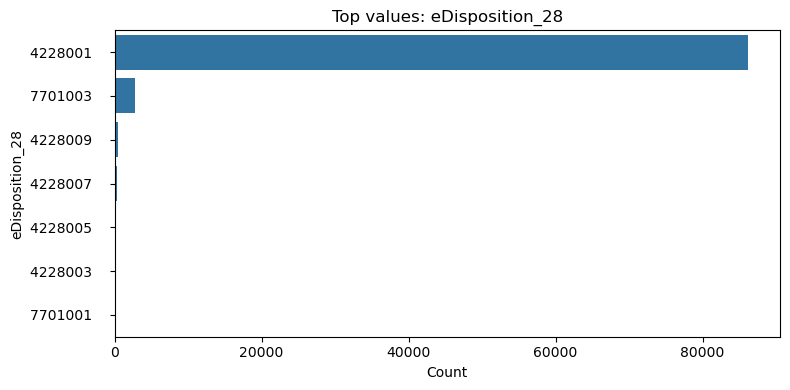

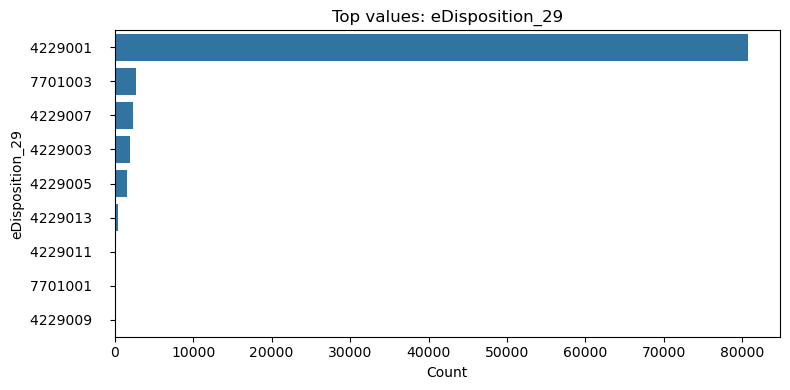

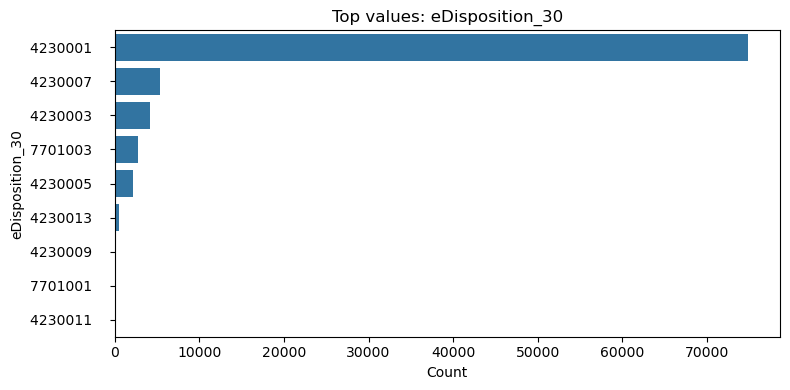

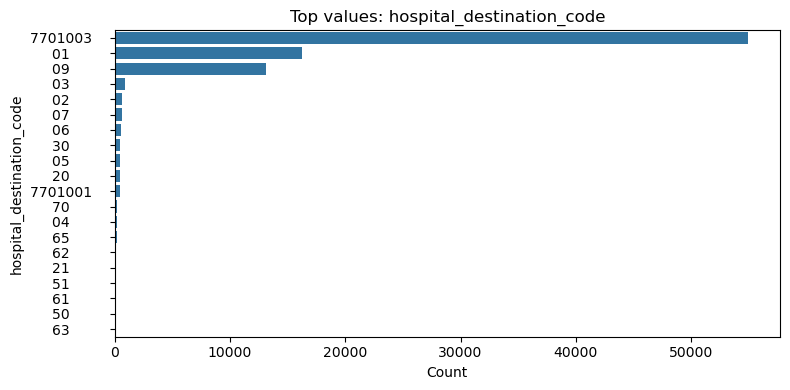

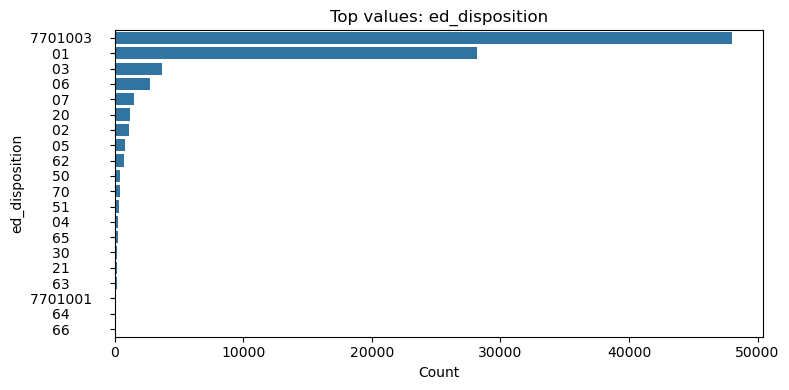

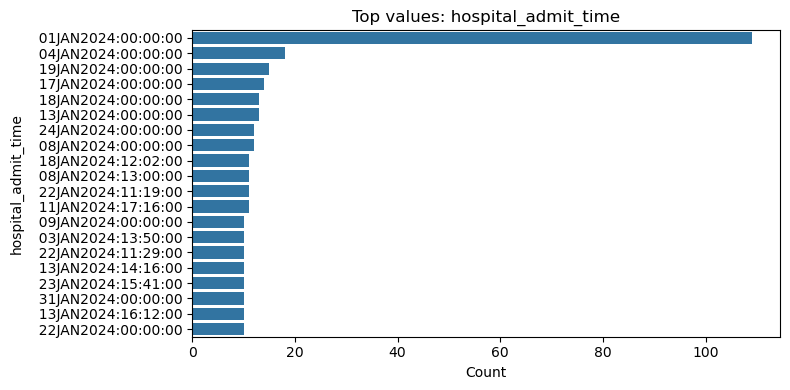

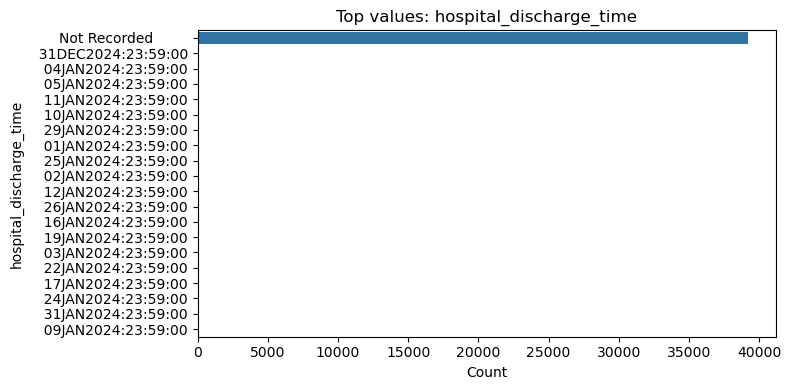

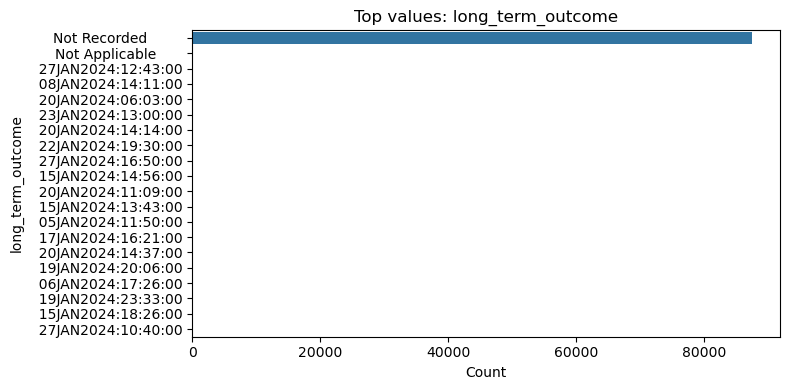

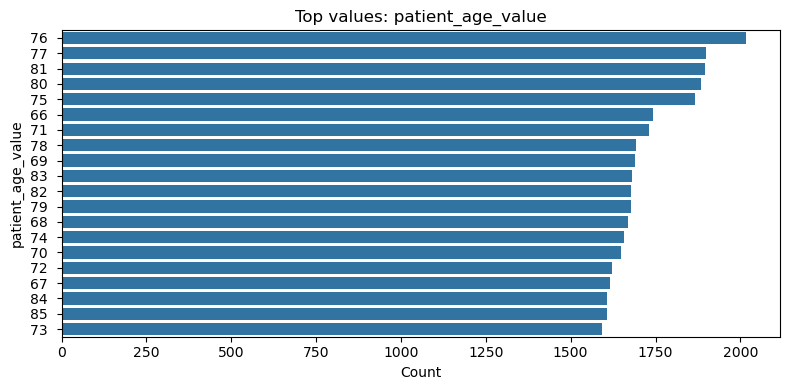

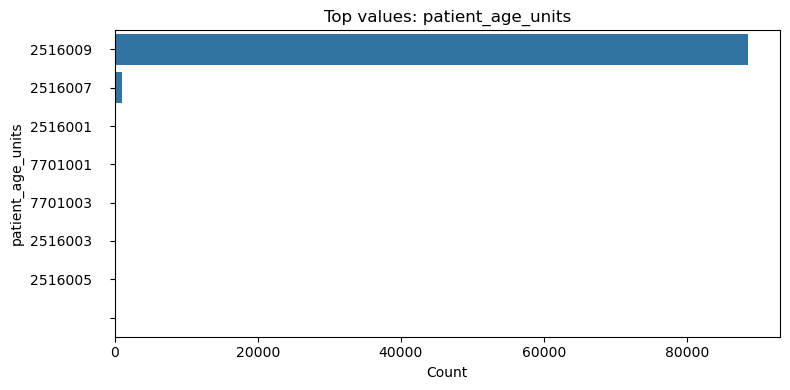

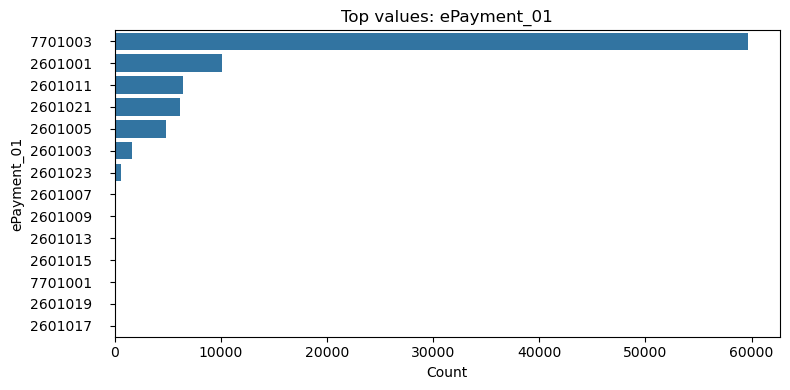

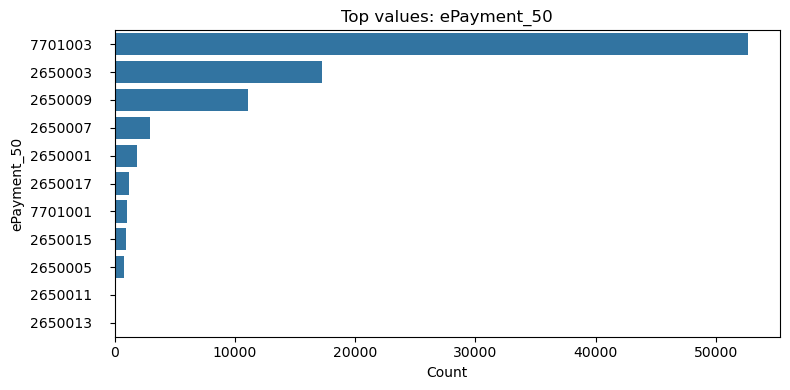

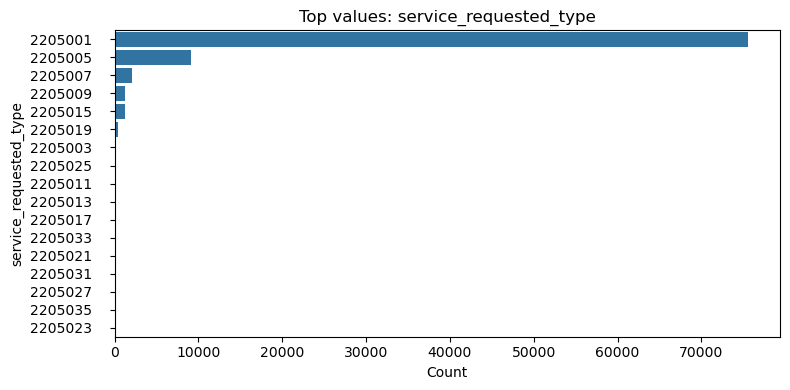

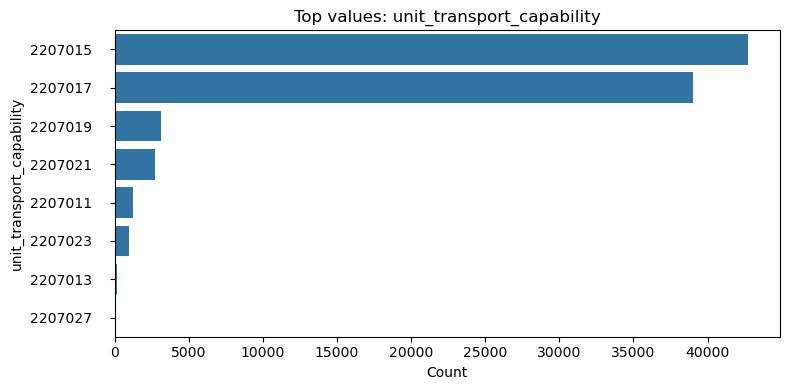

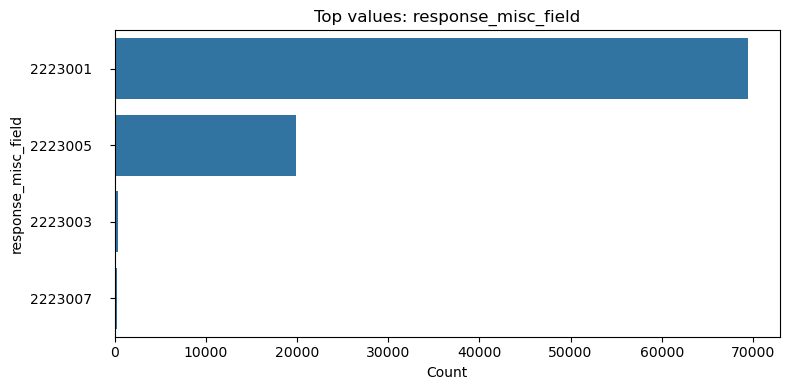

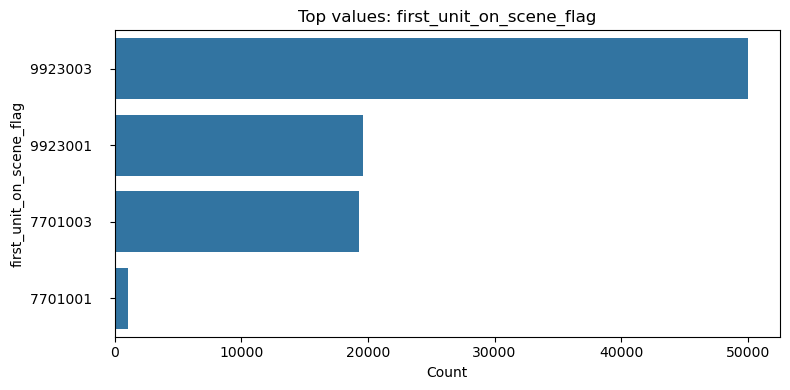

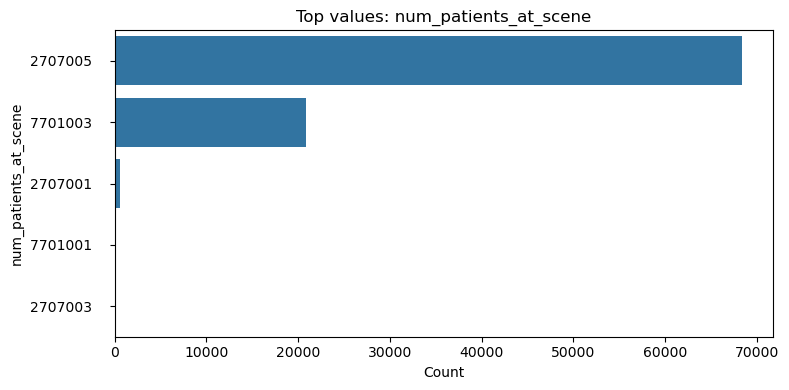

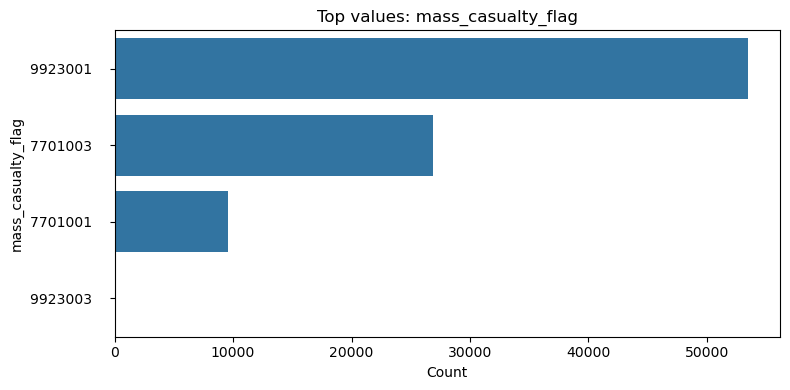

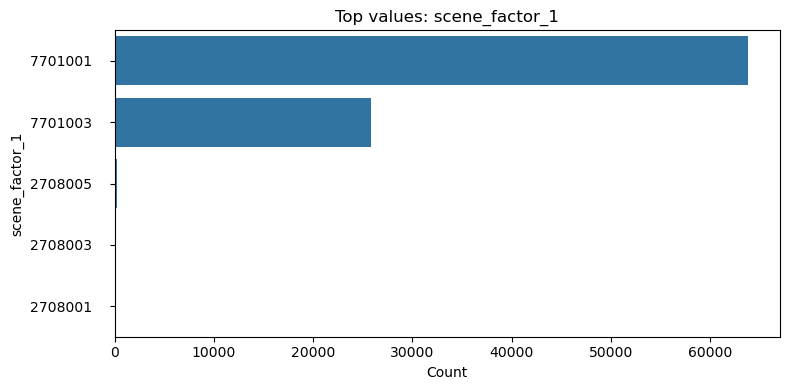

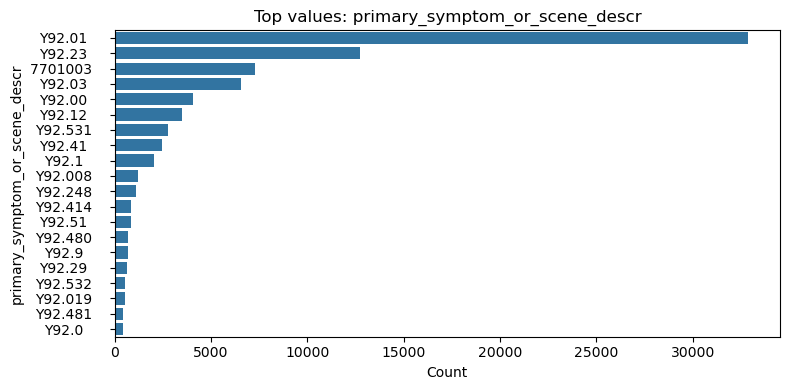

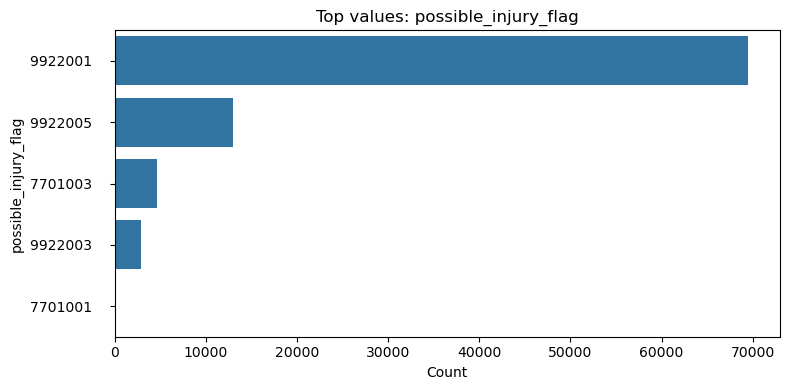

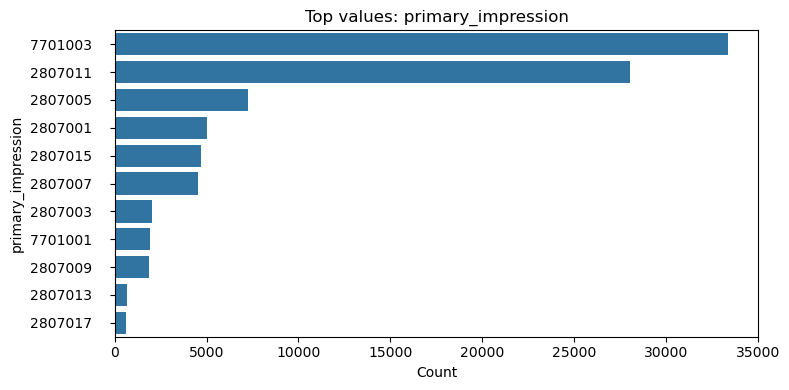

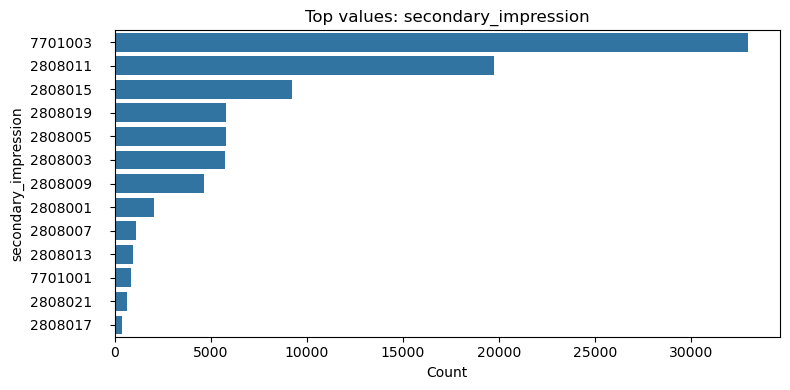

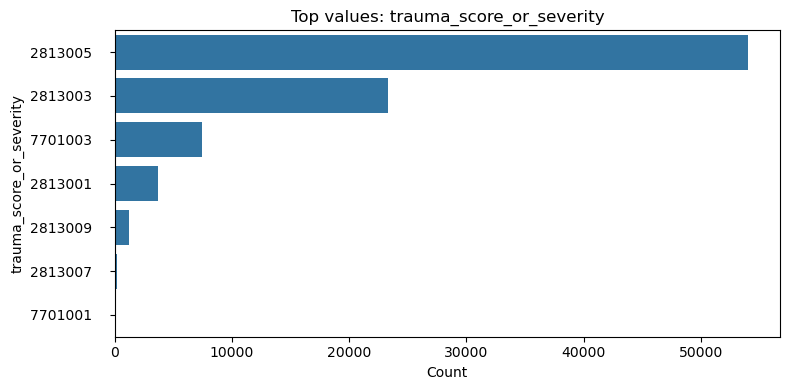

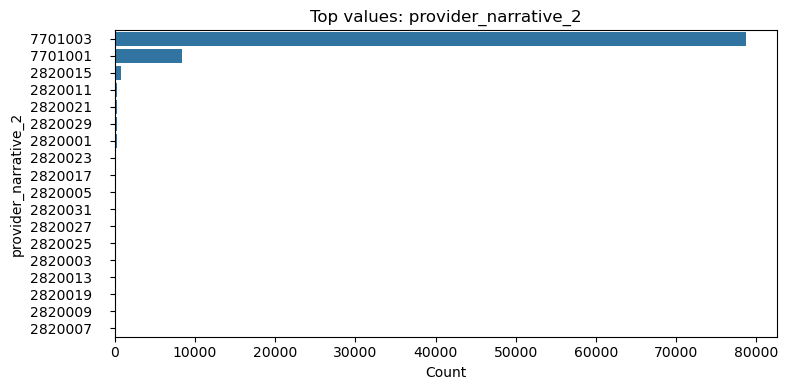

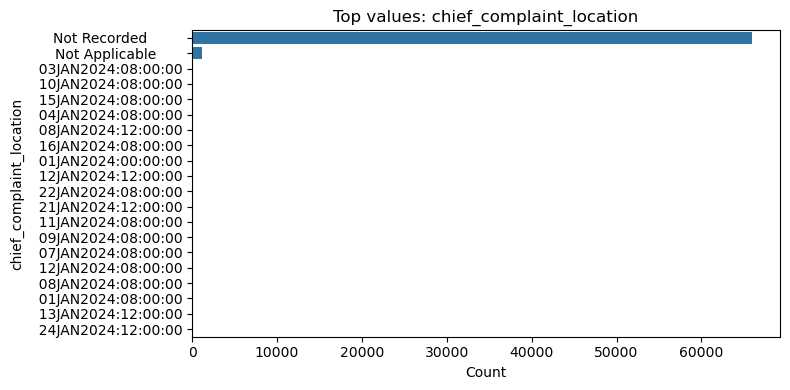

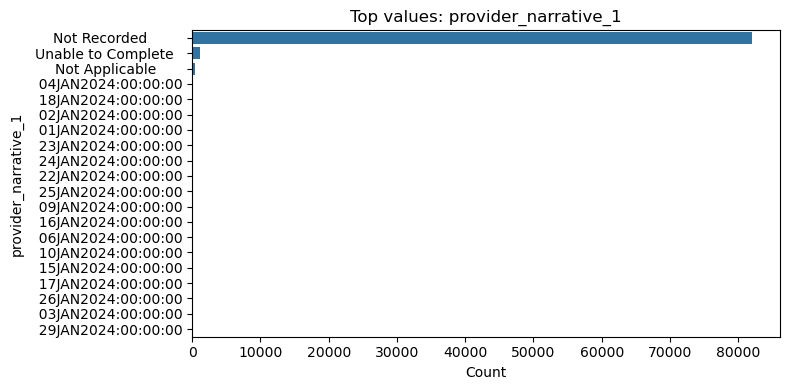

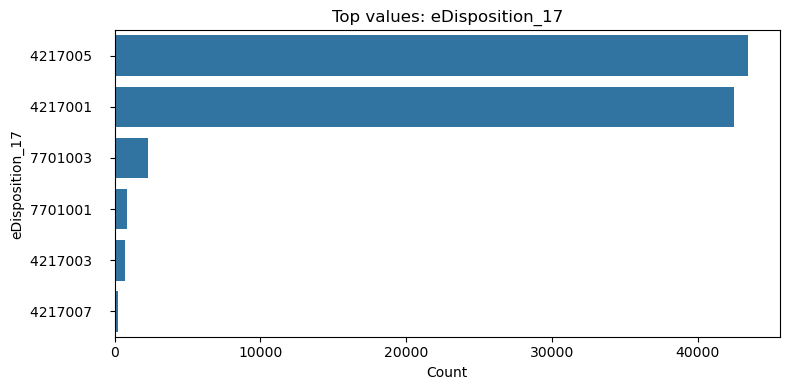

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric (non-binary) – histograms
for col in numerical_cols_non_binary:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f"Numeric distribution: {col}")
    plt.tight_layout()
    plt.show()

# Binary – bar plots
for col in binary_cols:
    vc = df[col].value_counts().sort_index()
    plt.figure(figsize=(4, 3))
    sns.barplot(x=vc.index.astype(str), y=vc.values)
    plt.title(f"Binary distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Categorical – top categories bar plots
for col in categorical_cols:
    vc = df[col].value_counts().head(20)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=vc.values, y=vc.index)
    plt.title(f"Top values: {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [26]:
df[[ "hospital_admit_time"]].head(100)


,hospital_admit_time
0,01JAN2024:18:47:00
1,01JAN2024:06:52:42
2,01JAN2024:10:45:00
3,01JAN2024:12:00:00
4,01JAN2024:00:48:00
...,...
95,02JAN2024:23:14:00
96,01JAN2024:17:04:00
97,01JAN2024:16:32:00
98,01JAN2024:10:40:00


In [27]:
raw = df["hospital_admit_time"].astype(str).str.strip()

# Counts of special values
na_counts = raw.value_counts()
print("Not Applicable:", na_counts.get("Not Applicable", 0))
print("Not Recorded:", na_counts.get("Not Recorded", 0))

# Count valid-looking date strings (everything else)
valid_mask = ~raw.isin(["Not Applicable", "Not Recorded"])
print("Valid-looking date strings:", valid_mask.sum())
print("Total rows:", len(df))


Not Applicable: 0
Not Recorded: 0
Valid-looking date strings: 90000
Total rows: 90000


In [28]:
df = df[df["hospital_admit_time"].notna()].copy()


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

print(len(df))                      # should be > 0
print(df["hospital_admit_time"].head(10))
print(df["hospital_admit_time"].dtype)


90000
0      01JAN2024:18:47:00
1      01JAN2024:06:52:42
2      01JAN2024:10:45:00
3      01JAN2024:12:00:00
4      01JAN2024:00:48:00
5      01JAN2024:17:04:00
6      01JAN2024:10:47:00
7      01JAN2024:05:15:00
8      01JAN2024:07:55:00
9      01JAN2024:03:42:00
Name: hospital_admit_time, dtype: object
object


0   2024-01-01 18:47:00
1   2024-01-01 06:52:42
2   2024-01-01 10:45:00
3   2024-01-01 12:00:00
4   2024-01-01 00:48:00
5   2024-01-01 17:04:00
6   2024-01-01 10:47:00
7   2024-01-01 05:15:00
8   2024-01-01 07:55:00
9   2024-01-01 03:42:00
Name: hospital_admit_time_parsed, dtype: datetime64[ns]
Parsed OK: 90000
Rows after filtering: 90000
admit_date
2024-01-01    2894
2024-01-02    3229
2024-01-03    3158
2024-01-04    3082
2024-01-05    2901
2024-01-06    2649
2024-01-07    2644
2024-01-08    3011
2024-01-09    2751
2024-01-10    2904
2024-01-11    2952
2024-01-12    3078
2024-01-13    2801
2024-01-14    2737
2024-01-15    2913
2024-01-16    2938
2024-01-17    3063
2024-01-18    3095
2024-01-19    2996
2024-01-20    2659
2024-01-21    2756
2024-01-22    3047
2024-01-23    3046
2024-01-24    2952
2024-01-25    3005
2024-01-26    2939
2024-01-27    2721
2024-01-28    2586
2024-01-29    2941
2024-01-30    2734
2024-01-31    2818
dtype: int64


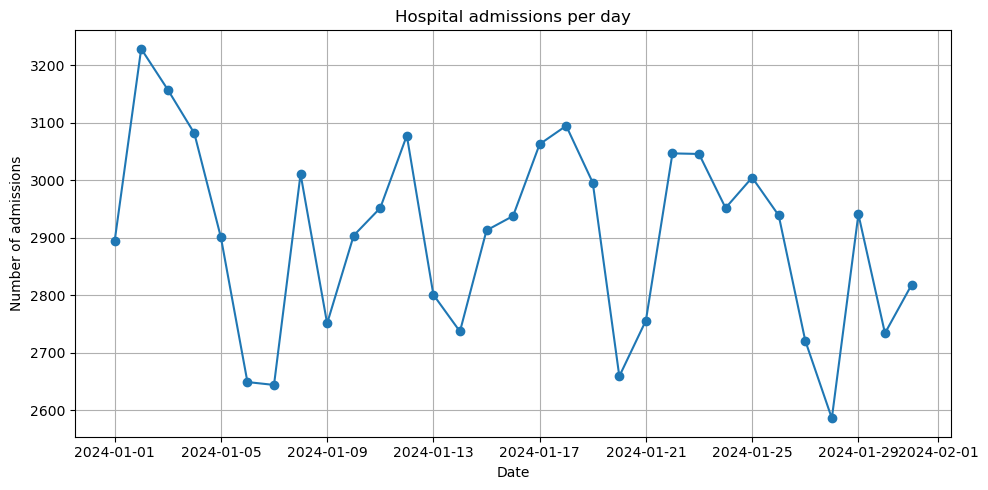

In [31]:
# 1) Parse datetime from the object column
df["hospital_admit_time_parsed"] = pd.to_datetime(
    df["hospital_admit_time"].astype(str).str.strip(),
    format="%d%b%Y:%H:%M:%S",
    errors="coerce",
)

print(df["hospital_admit_time_parsed"].head(10))
print("Parsed OK:", df["hospital_admit_time_parsed"].notna().sum())

# 2) Keep only successfully parsed rows
df_valid = df[df["hospital_admit_time_parsed"].notna()].copy()
print("Rows after filtering:", len(df_valid))

# 3) Aggregate by date and plot
df_valid["admit_date"] = df_valid["hospital_admit_time_parsed"].dt.date
daily_counts = df_valid.groupby("admit_date").size()
print(daily_counts)

plt.figure(figsize=(10, 5))
daily_counts.plot(kind="line", marker="o")
plt.title("Hospital admissions per day")
plt.xlabel("Date")
plt.ylabel("Number of admissions")
plt.grid(True)
plt.tight_layout()
plt.show()
